In [33]:
import pandas as pd
import numpy as np
import seaborn as sns


In [34]:
df = pd.read_csv(r'C:\Users\navji\Downloads\CIS_4930_Heart_Disease_Dataset.csv')

In [35]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,157,54.43,21.95,No,20,12,12,4
1,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,18-24,163,77.11,29.18,No,5,16,12,16
2,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,163,58.97,22.31,No,10,60,12,16
3,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,170,53.52,18.48,No,8,60,4,0
4,Excellent,Within the past 2 years,Yes,No,No,No,Yes,No,No,Female,30-34,175,61.23,19.94,No,4,10,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262527,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
262528,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
262529,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
262530,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [36]:
########################
#data transformation (going to add this)
dummies = pd.get_dummies(df['Age_Category'])
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis = 1)
df = df.drop(columns=['Age_Category'])

In [37]:
######################## (gets rid of those extra columns)
df['General_Health'] = df['General_Health'].str.strip()

In [38]:
#data transformation (going to add this)
dummies = pd.get_dummies(df['General_Health'])
dummies = dummies.astype(int) #i added this because the way this version of python works makes the boolean work better, issues without this line
df = pd.concat([df, dummies], axis = 1)
df = df.drop(columns=['General_Health'])


In [40]:
#########################
df['Checkup'] = df['Checkup'].str.strip()

In [41]:
dummies = pd.get_dummies(df['Checkup'])
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=['Checkup'])

In [45]:
#########################(OPTIONAL)
df = df.rename(columns={'Excellent': 'Excellent Health'})

In [49]:
######################## FEATURE ENGINEERING
'''When used with boolean values, the | operator evaluates to True if either of the operands is True.

For example:

True | False results in True.
False | False results in False.'''

df['40-49'] = df['40-44'] | df['45-49']
df['50-59'] = df['50-54'] | df['55-59']
df['60-69'] = df['60-64'] | df['65-69']
df['70-79'] = df['70-74'] | df['75-79']
df = df.drop(columns = ['40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79'], axis=1)
df

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Height_(cm),Weight_(kg),...,Very Good,5 or more years ago,Never,Within the past 2 years,Within the past 5 years,Within the past year,60-69,40-49,50-59,70-79
0,Yes,No,No,No,No,No,No,Female,157,54.43,...,1,0,0,0,0,1,0,0,0,0
1,Yes,No,No,No,No,Yes,No,Female,163,77.11,...,1,0,0,0,0,1,0,0,0,0
2,Yes,No,No,No,No,No,No,Female,163,58.97,...,1,0,0,0,0,1,0,0,0,0
3,Yes,No,No,No,No,No,No,Female,170,53.52,...,1,0,0,0,0,1,0,1,0,0
4,Yes,No,No,No,Yes,No,No,Female,175,61.23,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262527,Yes,No,No,No,No,No,No,Male,168,81.65,...,1,0,0,0,0,1,0,0,0,0
262528,Yes,No,No,No,No,Yes,No,Male,180,69.85,...,0,0,0,0,1,0,1,0,0,0
262529,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,157,61.23,...,1,1,0,0,0,0,0,0,0,0
262530,Yes,No,No,No,No,No,No,Male,183,79.38,...,1,0,0,0,0,1,1,0,0,0


In [57]:
df.columns
df.info()
df = df.dropna()
df.isna().sum()


Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
18-24                           0
25-29                           0
30-34                           0
35-39                           0
80+                             0
Excellent Health                0
Fair                            0
Good                            0
Poor                            0
Very Good                       0
5 or more years ago             0
Never                           0
Within the past 2 years         0
Within the pas

In [ ]:
'''KEEP THIS'''
'''CONVERT TO PYTHON'''


#-----------------------------Data Exploration ---------------------------------------------------


# viewing Column Names after removing Age_Category
'''col_names<-names(cvd_cleaned)
col_names
cvd_cleaned

#removing  "No, pre-diabetes or borderline diabetes &Yes, but female told only during pregnancy" from Diabetes Column
cvd_cleaned <- cvd_cleaned %>%
  filter(Diabetes != 'No, pre-diabetes or borderline diabetes' & 
           Diabetes != 'Yes, but female told only during pregnancy')

# viewing Diabetes column
cvd_cleaned$Diabetes
cvd_cleaned

# Converting the below columns into Binary
columns_to_convert <- c("Exercise", "Heart_Disease", "Skin_Cancer","Other_Cancer","Arthritis","Depression","Diabetes","Smoking_History")

# Convert 'Yes' to 1 and everything else to 0 in specified columns using mutate_at()
cvd_cleaned <- cvd_cleaned %>%
  mutate_at(vars(columns_to_convert), ~ ifelse(. == 'Yes', 1, 0))

#Convering "female" to 1 and Males to 0 in Sex column
cvd_cleaned$Sex <- ifelse(cvd_cleaned$Sex == "Female", 1, 0)

# remove 
cvd_cleaned <- cvd_cleaned %>%
  filter(Checkup != "Within the past 5 years" &
           Checkup != "Within the past 2 years" &
           Checkup != "5 or more years ago")

cvd_cleaned
cvd_cleaned$Checkup <- ifelse(cvd_cleaned$Checkup == "Within the past year", 1, 0)
cvd_cleaned

# Recreate the 'Group1' column based on 'General_Health' values
cvd_cleaned <- cvd_cleaned %>%
  mutate(Group1 = case_when(
    General_Health %in% c("Very Good", "Good", "Excellent") ~ "High",
    General_Health %in% c("Poor", "Fair") ~ "Low",
    TRUE ~ NA_character_
  )) %>%
  select(-General_Health) %>%  # Drop 'General_Health' column
  rename(General_Health = Group1) %>%  # Rename 'Group1' to 'General_Health'
  mutate(General_Health = ifelse(General_Health == "High", 1, 0))  # Assign 1 to "High" and 0 to everything else'''




In [ ]:
'''KEEP'''


'''#removing  "No, pre-diabetes or borderline diabetes &Yes, but female told only during pregnancy" from Diabetes Column
cvd_cleaned <- cvd_cleaned %>%
  filter(Diabetes != 'No, pre-diabetes or borderline diabetes' & 
           Diabetes != 'Yes, but female told only during pregnancy')'''

In [ ]:
'''KEEP'''


'''# Converting the below columns into Binary
columns_to_convert <- c("Exercise", "Heart_Disease", "Skin_Cancer","Other_Cancer","Arthritis","Depression","Diabetes","Smoking_History")

# Convert 'Yes' to 1 and everything else to 0 in specified columns using mutate_at()
cvd_cleaned <- cvd_cleaned %>%
  mutate_at(vars(columns_to_convert), ~ ifelse(. == 'Yes', 1, 0))'''


In [ ]:
'''KEEP'''



'''#Convering "female" to 1 and Males to 0 in Sex column
cvd_cleaned$Sex <- ifelse(cvd_cleaned$Sex == "Female", 1, 0)'''

In [ ]:
'''KEEP'''

#drop that column

'''# remove 
cvd_cleaned <- cvd_cleaned %>%
  filter(Checkup != "Within the past 5 years" &
           Checkup != "Within the past 2 years" &
           Checkup != "5 or more years ago")'''

In [ ]:
'''KEEP'''

'''# Recreate the 'Group1' column based on 'General_Health' values
cvd_cleaned <- cvd_cleaned %>%
  mutate(Group1 = case_when(
    General_Health %in% c("Very Good", "Good", "Excellent") ~ "High",
    General_Health %in% c("Poor", "Fair") ~ "Low",
    TRUE ~ NA_character_
  )) %>%
  select(-General_Health) %>%  # Drop 'General_Health' column
  rename(General_Health = Group1) %>%  # Rename 'Group1' to 'General_Health'
  mutate(General_Health = ifelse(General_Health == "High", 1, 0))  # Assign 1 to "High" and 0 to everything else'''


Markdown

In [ ]:
'''CONVERT TO PYTHON'''

'''train.index <- sample(c(1:dim(cvd.df)[1]), dim(cvd.df)[1]*0.8)  
train.df <- cvd.df[train.index, ]
valid.df <- cvd.df[-train.index, ]

lm.fit <- glm(Heart_Disease ~ Checkup + Exercise + Skin_Cancer + Other_Cancer + Depression + Diabetes + Arthritis + Sex + BMI + Smoking_History +
                Alcohol_Consumption + Fruit_Consumption + Green_Vegetables_Consumption + FriedPotato_Consumption + Age_Above_60 + General_Health, data = train.df, 
              family = "binomial")
# remove scientific notation
options(scipen=999) 
summary(lm.fit, digits=5)

pred <- predict(lm.fit, valid.df)
valid.df$predicted_prob <- predict(lm.fit, valid.df, type = "response")


confusionMatrix(factor(ifelse(pred > 0.5, "1", "0")), as.factor(valid.df$Heart_Disease))
'''

In [58]:
'''KEEP THIS'''
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Heart_Disease'], axis=1)
y = df['Heart_Disease']

In [60]:
'''KEEP THIS'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
train = x_train.join(y_train)
train.info()
df['Exercise'] = df['Exercise'].astype(int)
df['Skin_Cancer'] = df['Skin_Cancer'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Index: 210025 entries, 70368 to 139398
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Exercise                      210025 non-null  object 
 1   Skin_Cancer                   210025 non-null  object 
 2   Other_Cancer                  210025 non-null  object 
 3   Depression                    210025 non-null  object 
 4   Diabetes                      210025 non-null  object 
 5   Arthritis                     210025 non-null  object 
 6   Sex                           210025 non-null  object 
 7   Height_(cm)                   210025 non-null  int64  
 8   Weight_(kg)                   210025 non-null  float64
 9   BMI                           210025 non-null  float64
 10  Smoking_History               210025 non-null  object 
 11  Alcohol_Consumption           210025 non-null  int64  
 12  Fruit_Consumption             210025 non-null

ValueError: invalid literal for int() with base 10: 'Yes'

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>],
       [<Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>,
        <Axes: title={'center': '18-24'}>,
        <Axes: title={'center': '25-29'}>,
        <Axes: title={'center': '30-34'}>],
       [<Axes: title={'center': '35-39'}>,
        <Axes: title={'center': '80+'}>,
        <Axes: title={'center': 'Excellent Health'}>,
        <Axes: title={'center': 'Fair'}>,
        <Axes: title={'center': 'Good'}>],
       [<Axes: title={'center': 'Poor'}>,
        <Axes: title={'center': 'Very Good'}>,
        <Axes: title={'center': '5 or more years ago'}>,
        <Axes: title={'center': 'Never'}>,
        <Axes: title={'center': 'Within the past 2 years'}>],
       [<Axes: ti

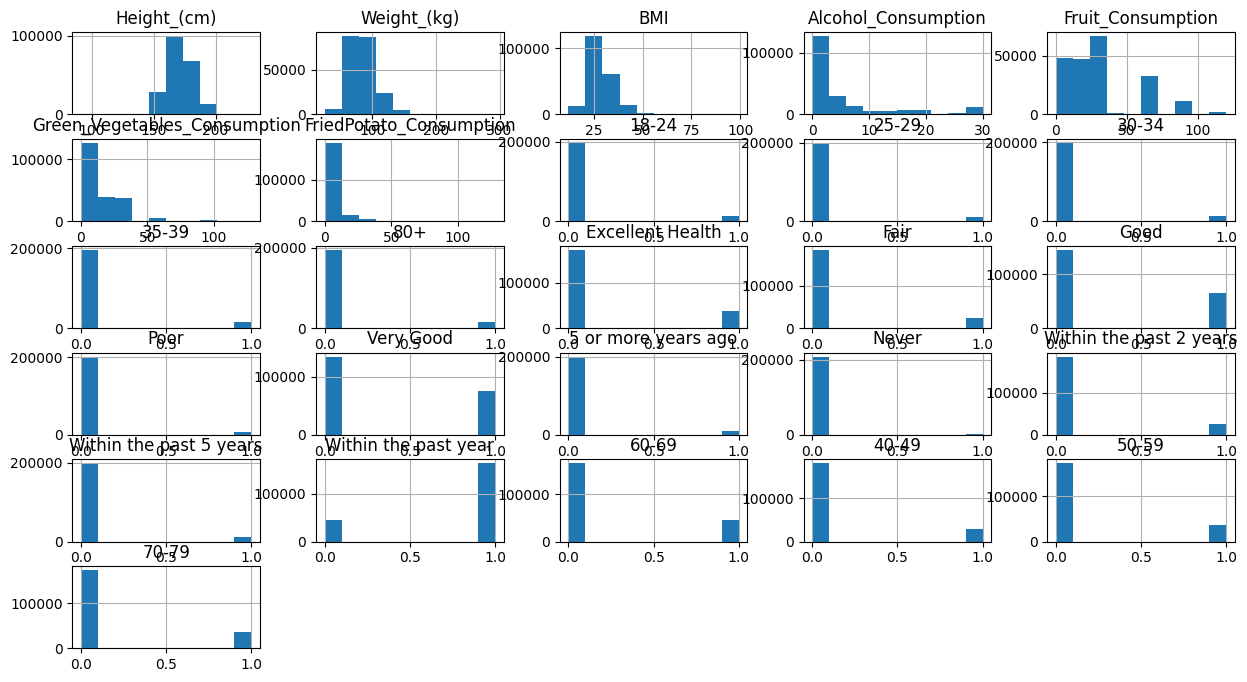

In [63]:
##########EXPLORATORY DATA ANALYSIS
train.hist(figsize=(15, 8))

In [65]:
##########EXPLORATORY DATA ANALYSIS

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.heatmap(train.corr(), annot=True)


# SCATTERPLOT
plt.figure(figsize=(15, 8))
sns.scatterplot(x="", y="", data=train, hue="",)



ValueError: could not convert string to float: 'Yes'

<Figure size 1500x800 with 0 Axes>

In [ ]:
'''KEEP THIS'''

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train.drop(['Heart_Disease'], axis=1), train['Heart_Disease']
x_train_s = scaler.fit_transform(x_train)

reg = LogisticRegression()

reg.fit(x_train, y_train)

In [ ]:
'''KEEP THIS'''

test = x_test.join(y_test)
x_test, y_test = test.drop(['Heart_Disease'], axis=1), test['Heart_Disease']
x_test_s = scaler.transform(x_test)


In [ ]:
'''KEEP THIS'''

test

In [ ]:
'''KEEP THIS'''

reg.score(x_test, y_test)
#KEEPING THIS ALSO MAKE SURE TO SHOW SUMMARY SCORE

In [ ]:
'''KEEP THIS'''

'''# remove scientific notation
options(scipen=999) 
summary(lm.fit, digits=5)

pred <- predict(lm.fit, valid.df)
valid.df$predicted_prob <- predict(lm.fit, valid.df, type = "response")


confusionMatrix(factor(ifelse(pred > 0.5, "1", "0")), as.factor(valid.df$Heart_Disease))
'''

In [ ]:
#WILL ADD THIS, ADD LOGISTIC CURVE AND AUROC